# Enter Student Name & ID

In [124]:
student_id =   400100554 #@param {type:"integer"}
student_name = "Seyed Mohammad Ojagh Kazzazi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400100554
your name: Seyed Mohammad Ojagh Kazzazi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def myPCA(X, num_components):
    # Step 1: Standardize the data (mean centering)
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort the eigenvectors by descending order of the eigenvalues
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    sorted_eigenvalues = eigenvalues[sorted_index]
    
    # Step 5: Select the first 'num_components' eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    
    return X_reduced


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

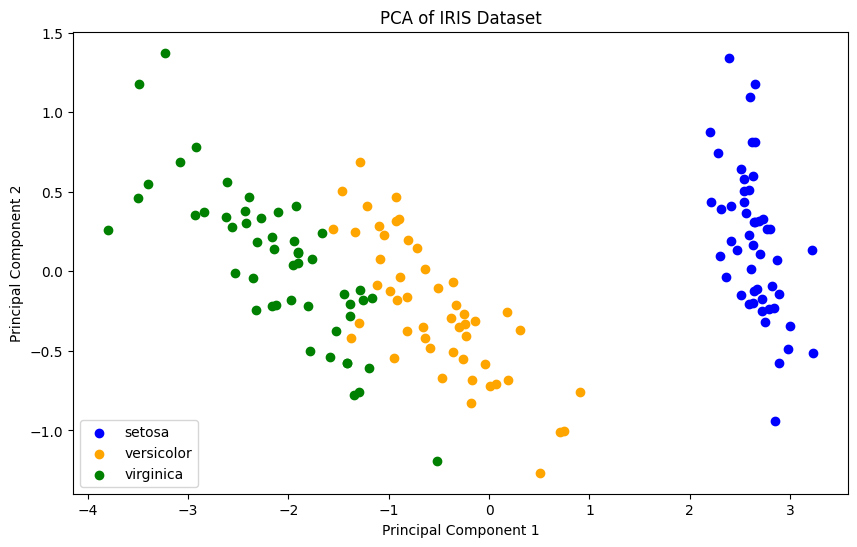

In [128]:

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the data to 2 dimensions
X_reduced = myPCA(X ,2)

# Plot the reduced data
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']
labels = ['setosa', 'versicolor', 'virginica']
for i in range(3):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=colors[i], label=labels[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the application of Principal Component Analysis (PCA) to a collection of face images.

### How Eigenfaces are Computed:
1. **Data Preparation**: The face images are flattened into one-dimensional vectors and arranged into a data matrix.

2. **Mean Centering**: The mean face vector is calculated and subtracted from each image vector, centering the data around the origin.

3. **Covariance Matrix**: The covariance matrix of the centered data is computed, capturing the variance between the different images.

4. **Eigenvalues and Eigenvectors**: Eigenvalues and eigenvectors of the covariance matrix are calculated. The eigenvectors represent the directions of maximum variance in the data and are termed as eigenfaces in the context of face recognition.

5. **Principal Components**: The eigenvectors are sorted by their corresponding eigenvalues in descending order, and the top eigenvectors are selected. These selected eigenvectors are the principal components, and in face recognition, they are referred to as eigenfaces.

### Relation to PCA:
- **Dimensionality Reduction**: PCA reduces the dimensionality of the dataset while preserving as much variance as possible. For face images, this means reducing the high-dimensional pixel space into a lower-dimensional subspace defined by the eigenfaces.

- **Feature Extraction**: The principal components (eigenfaces) capture the most significant features of the faces in the dataset. Each eigenface represents a pattern that can be used to reconstruct the face images.

- **Face Recognition**: By projecting the face images onto the eigenface subspace, we can represent each face with a smaller set of coefficients, which can then be used for efficient comparison and recognition.

Eigenfaces serve as an orthogonal basis set from which most faces can be constructed, highlighting the essential features of the faces in the dataset

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [129]:
import os
import glob
import cv2


# Directory containing the dataset
dataset_dir = 'ORL'

# Initialize lists to hold the data and labels
train_data, train_labels, test_data, test_labels = [], [], [], []

# Collect folder names
subject_folders = [folder for folder in sorted(os.listdir(dataset_dir)) if os.path.isdir(os.path.join(dataset_dir, folder))]

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    processed_images = []
    for path in image_paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            processed_images.append(image.flatten())
    return processed_images

# Iterate over each folder (each representing a person)
for label, folder in enumerate(subject_folders):
    folder_path = os.path.join(dataset_dir, folder)
    
    # Retrieve all image file paths in the folder
    image_files = sorted(glob.glob(os.path.join(folder_path, '*.bmp')))
    
    # Split image file paths into training and testing sets
    training_files, testing_files = image_files[:5], image_files[5:]
    
    # Load and preprocess images, then append to the respective lists
    train_data.extend(load_and_preprocess_images(training_files))
    train_labels.extend([label] * len(training_files))
    test_data.extend(load_and_preprocess_images(testing_files))
    test_labels.extend([label] * len(testing_files))

# Convert lists to numpy arrays
X_train = np.array(train_data)
y_train = np.array(train_labels)
X_test = np.array(test_data)
y_test = np.array(test_labels)

# Print the shapes of the arrays to verify the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [130]:
from sklearn.decomposition import PCA
def standardize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)
num_components = 45

# Standardize the data
X_train_std = standardize_data(X_train)
X_test_std = standardize_data(X_test)

pca = PCA(n_components=46)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_std)


   
X_test_pca = pca.transform(X_test_std)

# Print the shapes of the arrays to verify the transformation
print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')

X_train_pca shape: (200, 46)
X_test_pca shape: (200, 46)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [132]:
lda = LDA()
lda.fit(X_train_pca, y_train)

y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Dimensions: 100, Accuracy: 0.950
Dimensions: 95, Accuracy: 0.945
Dimensions: 90, Accuracy: 0.950
Dimensions: 85, Accuracy: 0.950
Dimensions: 80, Accuracy: 0.935
Dimensions: 75, Accuracy: 0.940
Dimensions: 70, Accuracy: 0.935
Dimensions: 65, Accuracy: 0.935
Dimensions: 60, Accuracy: 0.935
Dimensions: 55, Accuracy: 0.955
Dimensions: 50, Accuracy: 0.945
Dimensions: 45, Accuracy: 0.950
Dimensions: 40, Accuracy: 0.930
Maximum Accuracy: 0.955 at 55 dimensions


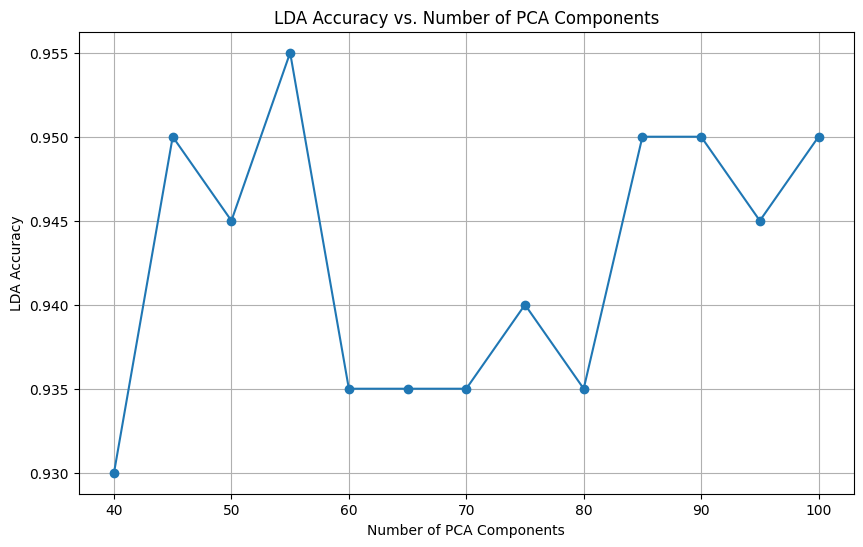

In [133]:
# Function to perform PCA, train LDA, and report accuracy
def perform_pca_and_lda(n_components):
    pca = PCA(n_components=n_components)

    # Standardize the data
    X_train_std = standardize_data(X_train)
    X_test_std = standardize_data(X_test)
    
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    
    y_pred = lda.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Iterate over the range of dimensions and store results
dimensions = list(range(100, 39, -5))
results = []

for dim in dimensions:
    accuracy = perform_pca_and_lda(dim)
    results.append((dim, accuracy))
    print(f'Dimensions: {dim}, Accuracy: {accuracy:.3f}')


max_accuracy = max(results, key=lambda x: x[1])
print(f'Maximum Accuracy: {max_accuracy[1]:.3f} at {max_accuracy[0]} dimensions')


# Plot the results
dims, accuracies = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(dims, accuracies, marker='o')
plt.title('LDA Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('LDA Accuracy')
plt.grid(True)
plt.show()

The analysis shows that the highest accuracy, 0.955, is achieved with 55 components. Using too few components can lead to underfitting, while using too many components can result in higher computational costs and potential overfitting. The plot illustrates these effects clearly.

## Detailed Discussion on the Impact of PCA Component Numbers on Model Accuracy:

#### Variance Retention:
 - High Number of Components: With more components, PCA captures a greater portion of the original data’s variance, preserving more information. This can enhance model accuracy by retaining relevant data.

 - Low Number of Components: Fewer components lead to more significant information loss, as PCA keeps only the most impactful components. This reduction can omit essential features, potentially decreasing model accuracy.


#### Balancing Overfitting and Underfitting:
 - High Number of Components: Keeping too many components can cause overfitting, where the model learns noise and specific details from the training data, compromising its generalizability to new data.

 - Low Number of Components: Retaining too few components can result in underfitting, where the model is too simplistic to capture the data's complexities, leading to subpar performance on both training and test datasets.


#### Computational Considerations:
 - High Number of Components: More components increase computational complexity and memory usage, slowing down the training process and making it difficult to scale to large datasets.

 - Low Number of Components: Fewer components reduce computational demands, speeding up the training process and making the model more scalable. This is particularly beneficial for handling large datasets or real-time applications.


#### Noise Management:
 - High Number of Components: Including many components can reintroduce noise into the model, which PCA aims to reduce. This noise can lower the model's performance.

 - Low Number of Components: Selecting fewer components helps reduce noise, potentially leading to a cleaner and more accurate model. However, it is crucial to ensure that the retained components sufficiently describe the data.


#### Model Interpretability:
- High Number of Components: A model with many components can become complex and harder to interpret, making it challenging to understand the input-output relationships.

- Low Number of Components: Fewer components simplify the model, enhancing interpretability and understanding. This is important in fields where model transparency and explainability are critical.

#### Domain-Specific Requirements:
 - High Number of Components: In domains like image or speech recognition, retaining more components may be necessary to capture subtle features.

 - Low Number of Components: In areas such as medical or financial applications, fewer components may suffice to capture essential patterns without overcomplicating the model.


#### Conclusion:
Selecting the number of PCA components involves balancing variance preservation and dimensionality reduction. It is beneficial to experiment with different component numbers and use cross-validation to find the optimal balance. Tools like scree plots, explained variance plots, and cumulative variance can aid in this decision-making process. The goal is to retain enough components to capture the data's structure accurately while avoiding overfitting, reducing noise, and ensuring computational efficiency.

